# Analyzing Ridge Regression Results for Distance Analysis
### Laurence Nickel (i6257119)

Libraries used: 
* pandas (version: '1.2.4')
* re (version: '2.2.1')
* sys (version: '3.8.8')
* os (version: '3.8.8')
* plotly.express (version: '5.13.1')
* seaborn (version: '0.11.1')
* matplotlib.pyplot (version: '3.3.4')

## Introduction

Within this notebook, the results of the ridge regression algorithms performed in the notebook 'Ridge Regression for Distance Analysis' to predict the expression levels for the genes considering the methylation values for the CpG sites where different distances are experimented with the goal of finding which of the distances is the best to use are analyzed. Since the number of distances experimented with was pretty high (40 distances), the results were split into multiple DataFrames which will be all loaded into this notebook. As a reminder, the distances presented in the overview below were experimented below:
* 5,000
* 10,000
* 15,000
* 25,000
* 50,000
* 75,000
* 100,000
* 150,000
* 250,000
* 350,000
* 500,000
* 750,000
* 1,000,000
* 1,500,000
* 2,000,000
* 2,500,000
* 4,000,000
* 5,000,000
* 6,000,000
* 7,500,000
* 10,000,000
* 12,500,000
* 15,000,000
* 17,500,000
* 20,000,000
* 25,000,000
* 30,000,000
* 40,000,000
* 50,000,000
* 65,000,000
* 80,000,000
* 100,000,000
* 120,000,000
* 150,000,000
* 200,000,000
* 250,000,000
* 350,000,000
* 500,000,000
* 750,000,000
* 1,000,000,000

For each of these distances ridge regression models were built, one for each gene, and these were evaluated by computing the R<super>2</super> value. This was performed for all genes present within the log2-transformed gene expression data for which the M-transformed methylation data was used to retrieve the methylation values for each of the CpG sites for each sample.

The kinds of analysis performed is displayed below:
* Plotting the distributions of R<super>2</super> scores for each of the distances. This is done through performing a general exploratory data analysis as well as plotting a box and whisker plot for each of the distances.


Eventually, the distance of the best performing experiment will represent which distance we should use to determine which CpG sites to consider (based on their position relative to a particular gene) for predicting the gene expression value of a particular gene.

### Importing libraries

Before we can start to define all the functions, we should first import some libraries that will be used throughout this notebook.

In [1]:
print("Starting the importing of the libraries...")


import pandas as pd
import re
import sys
import os

# Here we first need to install the plotly library.
!pip install plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


print("Finishing the installing of the libraries.")

Starting the importing of the libraries...
Finishing the installing of the libraries.


Now that all the libraries have been imported, we can verify that these libraries have been loaded into this notebook by calling the version property of the library.

In [2]:
# Retrieving the version of the libraries to verify they have been correctly loaded into this notebook.
print("The library 'pd' (pandas) has been loaded into the notebook with its version being:")
print(pd.__version__)

print("\nThe library 're' has been loaded into the notebook with its version being:")
print(re.__version__)

print("\nThe library 'sys' has been loaded into the notebook with its version being:")
print(sys.version)

print("\nThe library 'plotly' has been loaded into the notebook with its version being:")
print(plotly.__version__)

print("\nThe library 'sns' (seaborn) has been loaded into the notebook with its version being:")
print(sns.__version__)

print("\nThe library 'matplotlib' has been loaded into the notebook with its version being:")
print(matplotlib.__version__)

The library 'pd' (pandas) has been loaded into the notebook with its version being:
1.2.4

The library 're' has been loaded into the notebook with its version being:
2.2.1

The library 'sys' has been loaded into the notebook with its version being:
3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]

The library 'plotly' has been loaded into the notebook with its version being:
5.13.1

The library 'sns' (seaborn) has been loaded into the notebook with its version being:
0.11.1

The library 'matplotlib' has been loaded into the notebook with its version being:
3.3.4


### Defining the data directories

In addition, we also need to define our data directories from which the gene expression and methylation data files and the training and test splits data files will be loaded. Please mind that these need to be changed to the desired directories to be able to work with the data directories.

In [3]:
data_directory_location_files = "C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/location_data"
data_directory_results_distance = "C:/Users/laure/OneDrive/Documenten/Bachelor Thesis Data/results/Distance Analysis/Ridge Regression"

## Loading the Chromosomes Length File

### Loading the 'chromosomes_length_data.csv' file

Loading the 'chromosomes_length_data.csv' file into this notebook by calling the function 'pd.read_csv()' with as a parameter the to be read file.

In [4]:
# Loading the file 'chromosomes_length_data.csv'.
chromosomes_length_data = pd.read_csv(data_directory_location_files + '/chromosomes_length_data.csv')

print("The 'chromosomes_length_data' DataFrame containing the location data of the genes:")
chromosomes_length_data

The 'chromosomes_length_data' DataFrame containing the location data of the genes:


,chromosome,length
0,chr1,249250621
1,chr2,243199373
2,chr3,198022430
3,chr4,191154276
4,chr5,180915260
5,chr6,171115067
6,chr7,159138663
7,chr8,146364022
8,chr9,141213431
9,chr10,135534747


## Loading the R2 scores files

Within this section, the files containing the R<super>2</super> scores for multiple distances are loaded into this notebook:
* R2_5000_to_50000_df.csv
* R2_75000_to_350000_df.csv
* R2_500000_to_2000000_df.csv
* R2_2500000_to_7500000_df.csv
* R2_10000000_to_20000000_df.csv
* R2_25000000_to_65000000_df.csv
* R2_80000000_to_200000000_df.csv
* R2_250000000_to_1000000000_df.csv

These are present in the directory 'data_directory_results_distance'. For each of the corresponding files, this can be achieved by calling the function 'pd.read_csv()' with as a parameter the to be read file.

#### Loading the 'R2_5000_to_50000_df.csv' file into this notebook

In [5]:
# Loading the 'R2_5000_to_50000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_5000_to_50000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_5000_to_50000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_5000_to_50000_df.set_index(R2_5000_to_50000_df.columns[0], inplace=True)

print("The 'R2_5000_to_50000_df' DataFrame containing the data from the 'R2_5000_to_50000_df.csv' file:")
R2_5000_to_50000_df

The 'R2_5000_to_50000_df' DataFrame containing the data from the 'R2_5000_to_50000_df.csv' file:


,"5,000","10,000","15,000","25,000","50,000"
Gene,,,,,
ENSG00000001561,0.109302,0.109302,0.109302,0.109302,-0.088651
ENSG00000001626,0.166791,0.166791,0.166791,0.166791,0.166791
ENSG00000001629,-0.223797,-0.223797,-0.223797,-0.172707,0.050403
ENSG00000001631,0.133120,0.133120,0.133120,0.133120,0.045137
ENSG00000002587,0.244222,0.244222,0.244222,0.405822,0.316094
...,...,...,...,...,...
ENSG00000287828,-0.284411,-1.097185,-1.296912,-1.556662,-3.246836
ENSG00000287893,0.215116,0.215116,0.215116,0.215116,0.190256
ENSG00000288156,0.432917,0.401798,0.245513,0.245513,0.255785


#### Loading the 'R2_75000_to_350000_df.csv' file into this notebook

In [6]:
# Loading the 'R2_75000_to_350000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_75000_to_350000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_75000_to_350000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_75000_to_350000_df.set_index(R2_75000_to_350000_df.columns[0], inplace=True)

print("The 'R2_75000_to_350000_df' DataFrame containing the data from the 'R2_75000_to_350000_df.csv' file:")
R2_75000_to_350000_df

The 'R2_75000_to_350000_df' DataFrame containing the data from the 'R2_75000_to_350000_df.csv' file:


,"75,000","100,000","150,000","250,000","350,000"
Gene,,,,,
ENSG00000001561,-0.088651,-0.099852,0.034336,0.073452,-0.624794
ENSG00000001626,0.166791,0.166791,0.166791,0.044676,0.067665
ENSG00000001629,0.050403,0.018657,0.036401,0.036401,-0.343171
ENSG00000001631,0.267349,0.309994,0.463219,0.457633,0.353398
ENSG00000002587,0.316094,0.316094,0.316094,0.316094,0.316094
...,...,...,...,...,...
ENSG00000287828,-3.246254,-3.691077,-1.360769,-0.718913,-0.371645
ENSG00000287893,0.104710,0.104710,0.050554,0.109375,0.109375
ENSG00000288156,0.361512,0.250492,0.156589,-0.525665,-0.270136


#### Loading the 'R2_500000_to_2000000_df.csv' file into this notebook

In [7]:
# Loading the 'R2_500000_to_2000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_500000_to_2000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_500000_to_2000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_500000_to_2000000_df.set_index(R2_500000_to_2000000_df.columns[0], inplace=True)

print("The 'R2_500000_to_2000000_df' DataFrame containing the data from the 'R2_500000_to_2000000_df.csv' file:")
R2_500000_to_2000000_df

The 'R2_500000_to_2000000_df' DataFrame containing the data from the 'R2_500000_to_2000000_df.csv' file:


,"500,000","750,000","1,000,000","1,500,000","2,000,000"
Gene,,,,,
ENSG00000001561,-0.741329,-0.919156,-0.545997,-0.263706,-0.123435
ENSG00000001626,0.052373,-0.047253,-0.047253,-0.364280,-0.364280
ENSG00000001629,-0.386355,-0.439692,-0.742138,-2.797672,-3.510068
ENSG00000001631,0.310103,0.162025,-0.391996,-0.616887,-0.625840
ENSG00000002587,0.355325,0.337848,0.178094,0.289444,0.043498
...,...,...,...,...,...
ENSG00000287828,-0.426263,-0.422751,-0.134378,0.025795,0.157050
ENSG00000287893,0.209361,0.263191,0.256667,0.222180,0.204934
ENSG00000288156,-0.279079,-0.238077,0.373811,0.374159,0.368013


#### Loading the 'R2_2500000_to_7500000_df.csv' file into this notebook

In [8]:
# Loading the 'R2_2500000_to_7500000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_2500000_to_7500000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_2500000_to_7500000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_2500000_to_7500000_df.set_index(R2_2500000_to_7500000_df.columns[0], inplace=True)

print("The 'R2_2500000_to_7500000_df' DataFrame containing the data from the 'R2_2500000_to_7500000_df.csv' file:")
R2_2500000_to_7500000_df

The 'R2_2500000_to_7500000_df' DataFrame containing the data from the 'R2_2500000_to_7500000_df.csv' file:


,"2,500,000","4,000,000","5,000,000","6,000,000","7,500,000"
Gene,,,,,
ENSG00000001561,-0.059574,0.257321,0.269389,0.353642,0.472870
ENSG00000001626,-0.364280,-0.542739,-0.876982,-1.267356,-3.585200
ENSG00000001629,-3.231083,-2.048139,-1.823990,-1.671092,-1.097400
ENSG00000001631,-0.619675,-0.653425,0.224734,0.330991,0.223584
ENSG00000002587,-0.541713,0.279115,0.513119,0.497179,0.477160
...,...,...,...,...,...
ENSG00000287828,0.259809,0.242840,0.294949,0.288470,0.307173
ENSG00000287893,-0.048999,0.193316,0.118590,-0.008475,0.379695
ENSG00000288156,0.347472,0.432100,0.487509,0.465079,0.503930


#### Loading the 'R2_10000000_to_20000000_df.csv' file into this notebook

In [9]:
# Loading the 'R2_10000000_to_20000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_10000000_to_20000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_10000000_to_20000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_10000000_to_20000000_df.set_index(R2_10000000_to_20000000_df.columns[0], inplace=True)

print("The 'R2_10000000_to_20000000_df' DataFrame containing the data from the 'R2_10000000_to_20000000_df.csv' file:")
R2_10000000_to_20000000_df

The 'R2_10000000_to_20000000_df' DataFrame containing the data from the 'R2_10000000_to_20000000_df.csv' file:


,"10,000,000","12,500,000","15,000,000","17,500,000","20,000,000"
Gene,,,,,
ENSG00000001561,0.529559,0.577585,0.550001,0.520193,0.539808
ENSG00000001626,-6.910209,-5.902427,-2.346673,-0.439086,-0.103477
ENSG00000001629,-0.590349,-0.609213,-0.548342,-0.555361,-0.581540
ENSG00000001631,0.317914,0.324799,0.303627,0.321968,0.323060
ENSG00000002587,0.425619,0.335366,0.387127,0.401134,0.406777
...,...,...,...,...,...
ENSG00000287828,0.296657,0.270542,0.304619,0.292312,0.304878
ENSG00000287893,0.508279,0.547233,0.547221,0.525057,0.554536
ENSG00000288156,0.534616,0.548090,0.548567,0.565910,0.559937


#### Loading the 'R2_25000000_to_65000000_df.csv' file into this notebook

In [10]:
# Loading the 'R2_25000000_to_65000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_25000000_to_65000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_25000000_to_65000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_25000000_to_65000000_df.set_index(R2_25000000_to_65000000_df.columns[0], inplace=True)

print("The 'R2_25000000_to_65000000_df' DataFrame containing the data from the 'R2_25000000_to_65000000_df.csv' file:")
R2_25000000_to_65000000_df

The 'R2_25000000_to_65000000_df' DataFrame containing the data from the 'R2_25000000_to_65000000_df.csv' file:


,"25,000,000","30,000,000","40,000,000","50,000,000","65,000,000"
Gene,,,,,
ENSG00000001561,0.558555,0.566954,0.554974,0.570014,0.576470
ENSG00000001626,0.031728,0.139365,0.129479,0.185629,0.240123
ENSG00000001629,-0.420642,-0.349805,-0.309618,-0.140351,-0.072961
ENSG00000001631,0.405178,0.433569,0.413046,0.417215,0.387745
ENSG00000002587,0.402946,0.427889,0.480840,0.506682,0.511179
...,...,...,...,...,...
ENSG00000287828,0.338603,0.333822,0.407671,0.403517,0.380716
ENSG00000287893,0.553541,0.599366,0.632307,0.628266,0.637779
ENSG00000288156,0.557777,0.566397,0.547813,0.554978,0.579389


#### Loading the 'R2_80000000_to_200000000_df.csv' file into this notebook

In [11]:
# Loading the 'R2_80000000_to_200000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_80000000_to_200000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_80000000_to_200000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_80000000_to_200000000_df.set_index(R2_80000000_to_200000000_df.columns[0], inplace=True)

print("The 'R2_80000000_to_200000000_df' DataFrame containing the data from the 'R2_80000000_to_200000000_df.csv' file:")
R2_80000000_to_200000000_df

The 'R2_80000000_to_200000000_df' DataFrame containing the data from the 'R2_80000000_to_200000000_df.csv' file:


,"80,000,000","100,000,000","120,000,000","150,000,000","200,000,000"
Gene,,,,,
ENSG00000001561,0.571275,0.582384,0.585770,0.574985,0.574985
ENSG00000001626,0.300352,0.326958,0.333530,0.333530,0.333530
ENSG00000001629,-0.102783,-0.097929,-0.097929,-0.097929,-0.097929
ENSG00000001631,0.432879,0.433399,0.433399,0.433399,0.433399
ENSG00000002587,0.535749,0.550974,0.575275,0.614342,0.599072
...,...,...,...,...,...
ENSG00000287828,0.400355,0.380825,0.411448,0.399688,0.411875
ENSG00000287893,0.656003,0.677311,0.673515,0.670833,0.670833
ENSG00000288156,0.579389,0.579389,0.579389,0.579389,0.579389


#### Loading the 'R2_250000000_to_1000000000_df.csv' file into this notebook

In [12]:
# Loading the 'R2_250000000_to_1000000000_df.csv' file into this notebook by calling the function 'pd.read_csv()'.
R2_250000000_to_1000000000_df = pd.read_csv(data_directory_results_distance + "/" + "R2_250000000_to_1000000000_df.csv")

# Setting the genes to be the index of the DataFrame by calling the function 'set_index()'.
R2_250000000_to_1000000000_df.set_index(R2_250000000_to_1000000000_df.columns[0], inplace=True)

print("The 'R2_250000000_to_1000000000_df' DataFrame containing the data from the 'R2_250000000_to_1000000000_df.csv' file:")
R2_250000000_to_1000000000_df

The 'R2_250000000_to_1000000000_df' DataFrame containing the data from the 'R2_250000000_to_1000000000_df.csv' file:


,"250,000,000","350,000,000","500,000,000","750,000,000","1,000,000,000"
Gene,,,,,
ENSG00000001561,0.574985,0.574985,0.574985,0.574985,0.574985
ENSG00000001626,0.333530,0.333530,0.333530,0.333530,0.333530
ENSG00000001629,-0.097929,-0.097929,-0.097929,-0.097929,-0.097929
ENSG00000001631,0.433399,0.433399,0.433399,0.433399,0.433399
ENSG00000002587,0.599072,0.599072,0.599072,0.599072,0.599072
...,...,...,...,...,...
ENSG00000287828,0.408726,0.408726,0.408726,0.408726,0.408726
ENSG00000287893,0.670833,0.670833,0.670833,0.670833,0.670833
ENSG00000288156,0.579389,0.579389,0.579389,0.579389,0.579389


## Joining the R2 Scores DataFrames

Now that we have loaded the 8 different R<super>2</super> scores DataFrames into this notebook, we can join them horizontally into a single DataFrame. This can be achieved by calling the function 'join()' repeatedly which assures that the DataFrames are joined based on their indices (which are the genes).

In [13]:
# Horizontally joining the R2 scores DataFrames based on their indices (the genes).
R2_scores_all_distances = R2_5000_to_50000_df.join([R2_75000_to_350000_df, R2_500000_to_2000000_df, R2_2500000_to_7500000_df, R2_10000000_to_20000000_df, R2_25000000_to_65000000_df, R2_80000000_to_200000000_df, R2_250000000_to_1000000000_df])

print("The 'R2_scores_all_distances' DataFrame featuring the R2 scores of all the (40) distances:")
R2_scores_all_distances

The 'R2_scores_all_distances' DataFrame featuring the R2 scores of all the (40) distances:


,"5,000","10,000","15,000","25,000","50,000","75,000","100,000","150,000","250,000","350,000",...,"80,000,000","100,000,000","120,000,000","150,000,000","200,000,000","250,000,000","350,000,000","500,000,000","750,000,000","1,000,000,000"
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000001561,0.109302,0.109302,0.109302,0.109302,-0.088651,-0.088651,-0.099852,0.034336,0.073452,-0.624794,...,0.571275,0.582384,0.585770,0.574985,0.574985,0.574985,0.574985,0.574985,0.574985,0.574985
ENSG00000001626,0.166791,0.166791,0.166791,0.166791,0.166791,0.166791,0.166791,0.166791,0.044676,0.067665,...,0.300352,0.326958,0.333530,0.333530,0.333530,0.333530,0.333530,0.333530,0.333530,0.333530
ENSG00000001629,-0.223797,-0.223797,-0.223797,-0.172707,0.050403,0.050403,0.018657,0.036401,0.036401,-0.343171,...,-0.102783,-0.097929,-0.097929,-0.097929,-0.097929,-0.097929,-0.097929,-0.097929,-0.097929,-0.097929
ENSG00000001631,0.133120,0.133120,0.133120,0.133120,0.045137,0.267349,0.309994,0.463219,0.457633,0.353398,...,0.432879,0.433399,0.433399,0.433399,0.433399,0.433399,0.433399,0.433399,0.433399,0.433399
ENSG00000002587,0.244222,0.244222,0.244222,0.405822,0.316094,0.316094,0.316094,0.316094,0.316094,0.316094,...,0.535749,0.550974,0.575275,0.614342,0.599072,0.599072,0.599072,0.599072,0.599072,0.599072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000287828,-0.284411,-1.097185,-1.296912,-1.556662,-3.246836,-3.246254,-3.691077,-1.360769,-0.718913,-0.371645,...,0.400355,0.380825,0.411448,0.399688,0.411875,0.408726,0.408726,0.408726,0.408726,0.408726
ENSG00000287893,0.215116,0.215116,0.215116,0.215116,0.190256,0.104710,0.104710,0.050554,0.109375,0.109375,...,0.656003,0.677311,0.673515,0.670833,0.670833,0.670833,0.670833,0.670833,0.670833,0.670833
ENSG00000288156,0.432917,0.401798,0.245513,0.245513,0.255785,0.361512,0.250492,0.156589,-0.525665,-0.270136,...,0.579389,0.579389,0.579389,0.579389,0.579389,0.579389,0.579389,0.579389,0.579389,0.579389


## Analyzing the Ridge Regression Results

Using the 'R2_scores_all_distances' DataFrame to which all of the lists have been added, we can now create the box plots (one for each dataset combination) by calling the function 'boxplot()' from the 'Seaborn' library. We can also save this plot to the directory 'data_directory_results_distance' by calling the function 'savefig()'.

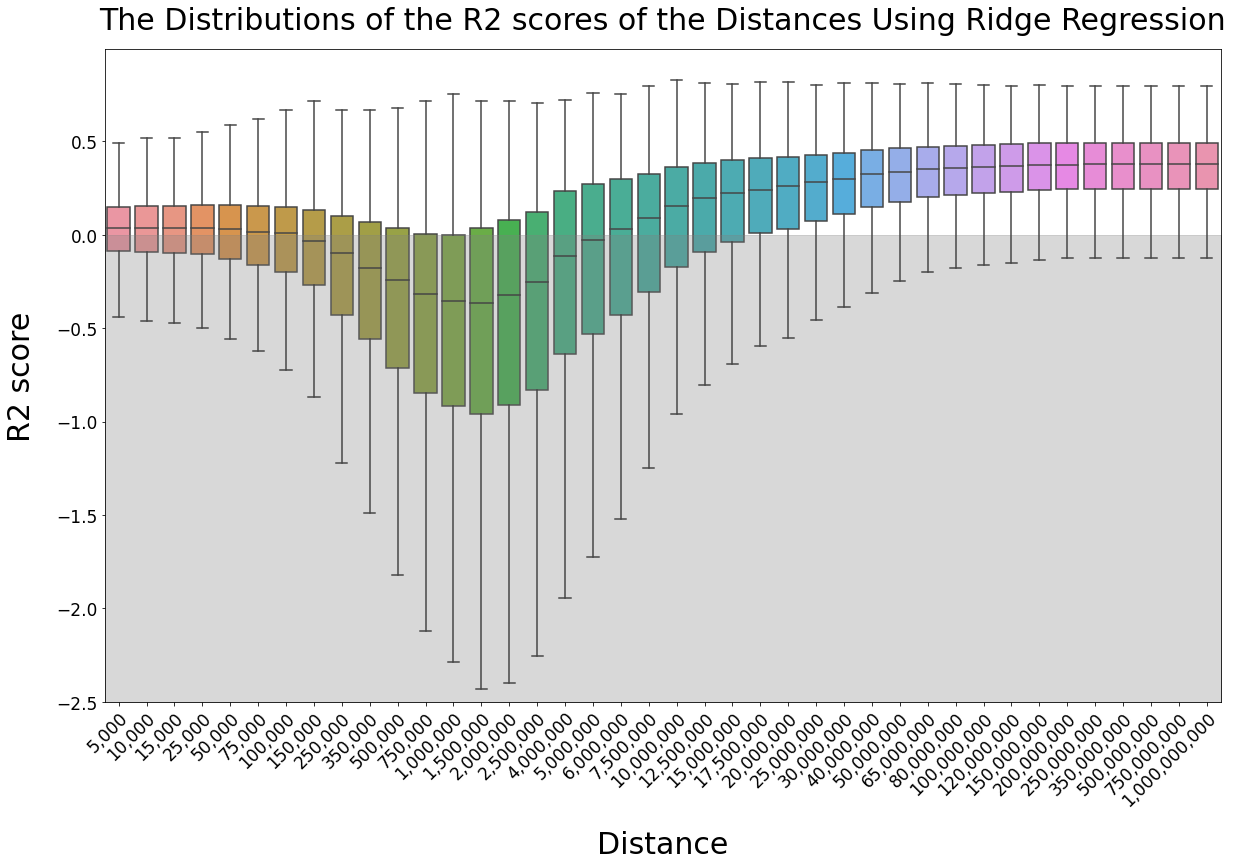

In [14]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=17)
ax.tick_params(axis='y', labelsize=17)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Ridge Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-2.5)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_all_distances_ridge_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

In addition, we can also display the median R<sup>2</sup> score for every distance. This can be achieved by calling the function 'median()'.

In [15]:
# Calculating the median of each of the distances of the 'R2_scores_all_distances' DataFrame by calling the function 
# 'median()'.
distance_medians = R2_scores_all_distances.median(numeric_only=True)

print("The median R2 score for every distributions of the 40 distances:")
distance_medians

The median R2 score for every distributions of the 40 distances:


5,000            0.033911
10,000           0.036669
15,000           0.038836
25,000           0.037544
50,000           0.028556
75,000           0.016113
100,000          0.007094
150,000         -0.031312
250,000         -0.095387
350,000         -0.177320
500,000         -0.243927
750,000         -0.316452
1,000,000       -0.354399
1,500,000       -0.367108
2,000,000       -0.321499
2,500,000       -0.252468
4,000,000       -0.114691
5,000,000       -0.025395
6,000,000        0.033201
7,500,000        0.089173
10,000,000       0.156414
12,500,000       0.198756
15,000,000       0.225177
17,500,000       0.241507
20,000,000       0.260201
25,000,000       0.283084
30,000,000       0.300674
40,000,000       0.325604
50,000,000       0.337060
65,000,000       0.351024
80,000,000       0.357959
100,000,000      0.364621
120,000,000      0.369773
150,000,000      0.373272
200,000,000      0.375666
250,000,000      0.376651
350,000,000      0.376651
500,000,000      0.376651
750,000,000 

As we can see from the box plots above, there is quite some fluctuation between the distributions of R<sup>2</sup> scores for the different distances. One thing we can notice though is that the distances starting from 5,000 seem to perform worse as the distance starts to increase with the lowest median R<sup>2</sup> score being for a distance of 1,500,000. After this distance, however, the median R<sup>2</sup> scores increases as the distance increases even reaching a median R<sup>2</sup> score that is higher than the one for a distance of 5,000. Therefore, we can already make the conclusion that while using ridge regression the larger distances (starting from around 7,500,000 onwards) perform better. A possible reason as to why there is not a steady increase from the smallest to the largest distances but there is instead a valley that interrupts this increasing could be that for these distances present within the valley there are quite a lot of CpG sites that have a negative influence on the prediction accuracy. The coefficients of these CpG sites are pushed towards zero by ridge regression but are not completely set equal to zero as for example lasso regression does causing them still to have a (negative) effect on the prediction of the gene expression value.

The increase in median R<sup>2</sup> score from a distance of 7,500,000 continues up until a distance of 250,000,000 where for even larger distances there does not seem to be any difference between the distributions. This can also be seen in the median R<sup>2</sup> scores being displayed before where the last 5 distances experimented with all have the same median R<sup>2</sup> score: 0.376651. This makes sense and is expected since as we can see from the 'chromosomes_length_data' DataFrame the chromosome with the largest length (chromosome 1) has a length of 249,250,621. This means since we only consider CpG sites for predicting a gene expression value that are located on the same chromosome as the gene, there are no additional CpG sites consider when increasing the distance from 250,000,000 to any other value. Therefore, we can also exclude these distances greater than 250,000,000 from the plot.

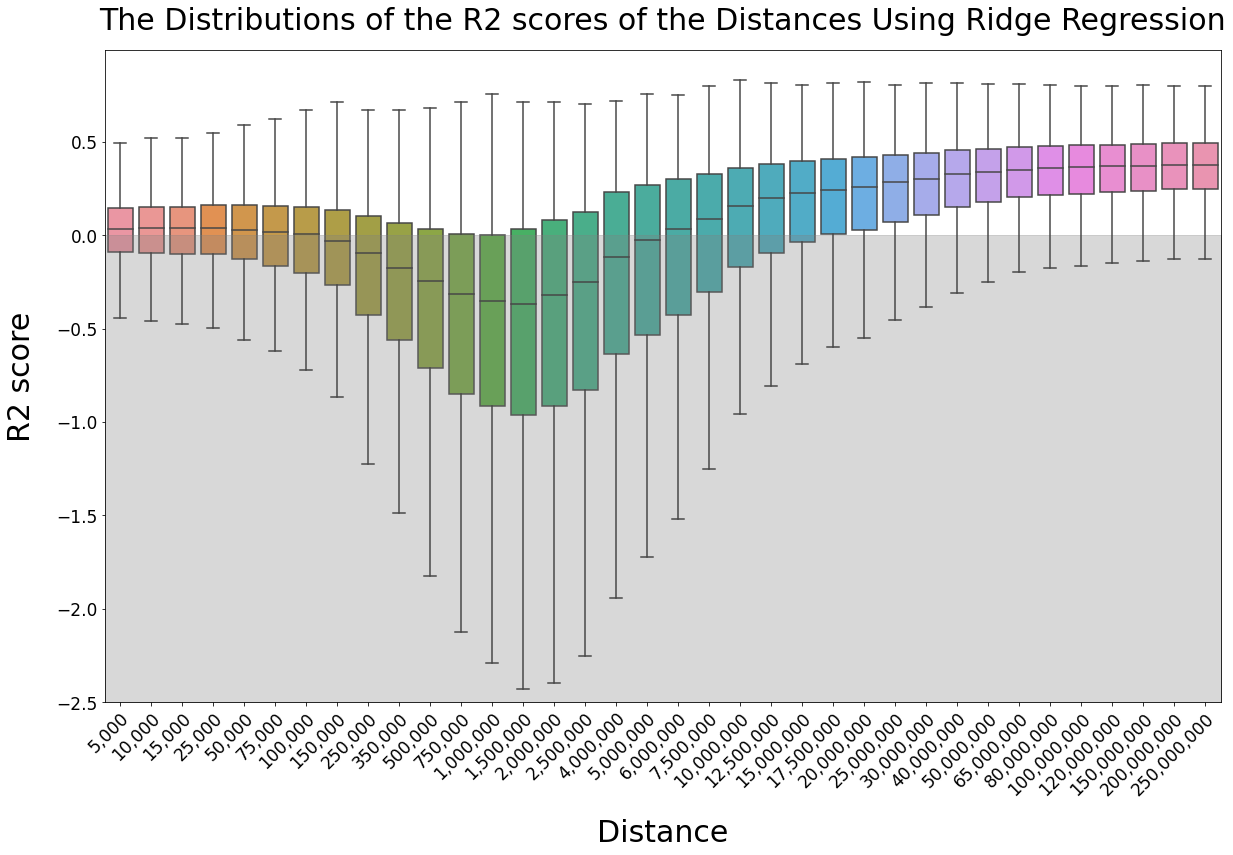

In [16]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances.iloc[:, :36], showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=17)
ax.tick_params(axis='y', labelsize=17)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Ridge Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-2.5)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns[:36]) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_distances_until_250000000_ridge_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

To increase the quality of the visualization to come to a conclusion as to when the median R<sup>2</sup> scores do not seem to increase anymore indicating that the distance right before it stops increasing actually performs the best we can focus a bit more on these by exclusively displaying these in the next plot.

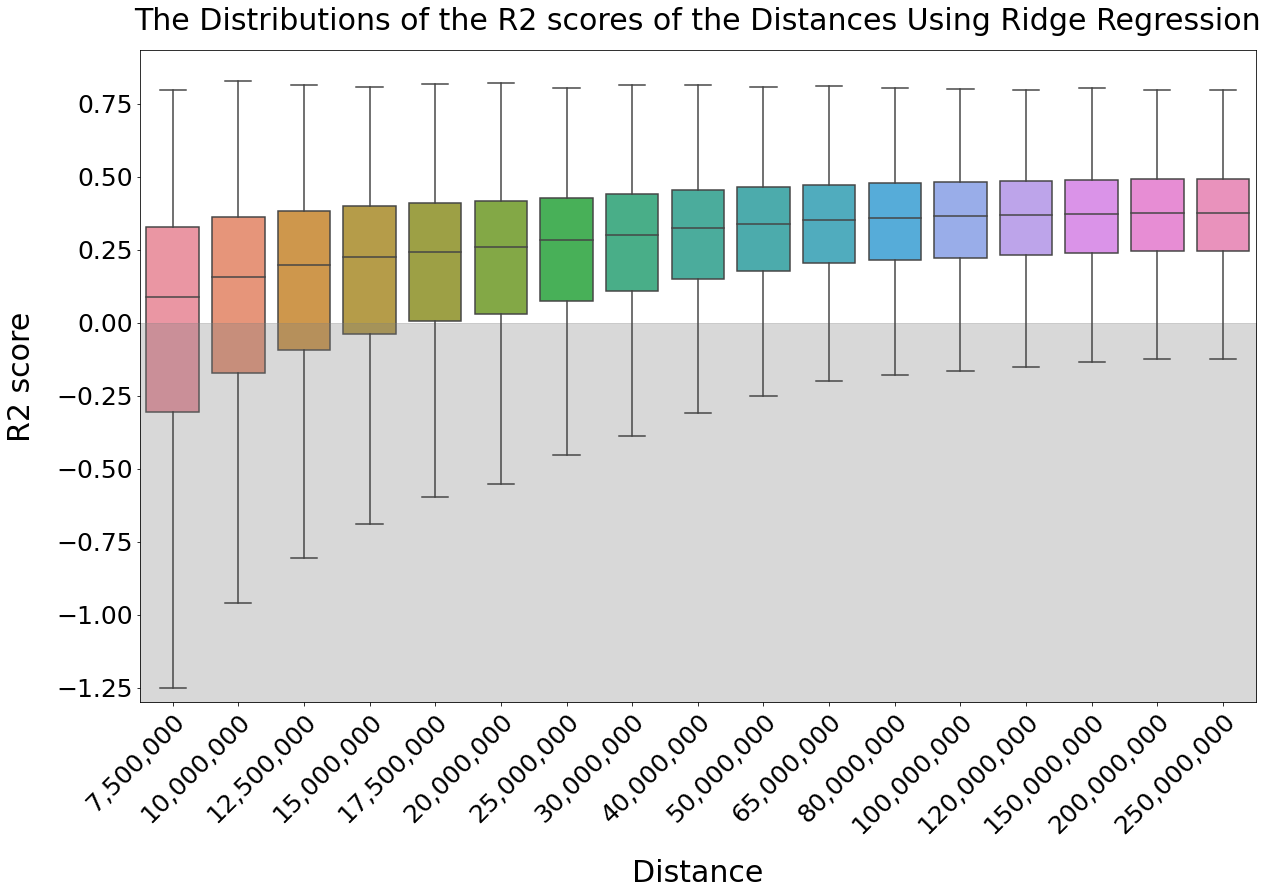

In [17]:
plt.figure(figsize=(20, 12))

# Creating a boxplot for every column (sample) in the 'R2_scores_all_distances' DataFrame, plotting them on the same axis, 
# without showing the outliers.
ax = sns.boxplot(data=R2_scores_all_distances.iloc[:, 19:36], showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=25)
ax.tick_params(axis='y', labelsize=25)

# Adding the legend, a title and the labels to the plot.
ax.set_title('The Distributions of the R2 scores of the Distances Using Ridge Regression', pad=20, fontsize=30)
ax.set_xlabel('Distance', labelpad=20, fontsize=30)
ax.set_ylabel('R2 score', labelpad=20, fontsize=30)

# Setting the area featuring negative R2 scores to be gray to more clearly display where the distributions are exactly 
# located.
ax.set_ylim(bottom=-1.3)
y_min = ax.get_ylim()[0]
ax.fill_between([-0.5, len(R2_scores_all_distances.columns[19:36]) - 0.5], y_min, 0, color='gray', alpha=0.3)

# Saving the plot by calling the function 'savefig()'.
file_to_save = data_directory_results_distance + f"/R2_scores_distances_from_7500000_ridge_regression.png"
plt.savefig(file_to_save, bbox_inches='tight')

# Show the plot
plt.show()

As we can see from the box plots above, from a distance of 7,500,000 onwards there is still (although slight) an increase in the median R<sup>2</sup> score when the distance is increased. We can conclude that a distance of 250,000,000 results in the highest prediction accuracy which can also be verified in the code below. It is important to note, however, that the differences in terms of median R<sup>2</sup> score with any of the surrounding distances is not that large.

In [18]:
# Retrieving the maximum median R2 score in the 'distance_medians' list by calling the function 'max()'.
max_median = max(distance_medians[:36])

# Retrieving the distances which have the highest median present in the 'distances_medians' list.
distance_with_highest_median = distance_medians[:36][distance_medians == max_median].index.tolist()

print("Distance with the highest median: ", distance_with_highest_median)

Distance with the highest median:  ['250,000,000']
